In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/Users/dev_martin/kobo/allBooks.csv')

In [3]:
df.head()

,Hush Little Girl,Lisa Regan,"#3 in Mystery & Suspense , Police Procedural #6 in Fiction & Literature , Thrillers #7 in Mystery & Suspense , Thrillers",$5.99,"Available Apr 14, 2021",2021-04-13
0,Juniper Wiles,Charles de Lint,"#1 in Science Fiction & Fantasy , Fantasy , Co...",$9.31,"Available Apr 30, 2021",2021-04-13
1,The Crown of Gilded Bones,Jennifer L. Armentrout,"#3 in Romance , New Adult #4 in Romance , Para...",$7.99,"Available Apr 20, 2021",2021-04-13
2,The Becoming,Nora Roberts,"#8 in Science Fiction & Fantasy , Fantasy #10 ...",$14.99,"Available Nov 23, 2021",2021-04-13
3,Forgotten in Death,J. D. Robb,"#9 in Romance , Romantic Suspense #13 in Myste...",$14.99,"Available Sep 7, 2021",2021-04-13
4,Freed,E L James,"#38 in Romance , Contemporary #42 in Fiction &...",$13.31,"Available Jun 1, 2021",2021-04-13


In [4]:
df.columns = ['Title', 'Author', 'Genre', 'Price', 'Available_date', 'Extract_date']

In [5]:
df.head()

,Title,Author,Genre,Price,Available_date,Extract_date
0,Juniper Wiles,Charles de Lint,"#1 in Science Fiction & Fantasy , Fantasy , Co...",$9.31,"Available Apr 30, 2021",2021-04-13
1,The Crown of Gilded Bones,Jennifer L. Armentrout,"#3 in Romance , New Adult #4 in Romance , Para...",$7.99,"Available Apr 20, 2021",2021-04-13
2,The Becoming,Nora Roberts,"#8 in Science Fiction & Fantasy , Fantasy #10 ...",$14.99,"Available Nov 23, 2021",2021-04-13
3,Forgotten in Death,J. D. Robb,"#9 in Romance , Romantic Suspense #13 in Myste...",$14.99,"Available Sep 7, 2021",2021-04-13
4,Freed,E L James,"#38 in Romance , Contemporary #42 in Fiction &...",$13.31,"Available Jun 1, 2021",2021-04-13


In [6]:
df.drop(['Author', 'Available_date', 'Extract_date'], axis=1, inplace=True)

In [7]:
df.head()

,Title,Genre,Price
0,Juniper Wiles,"#1 in Science Fiction & Fantasy , Fantasy , Co...",$9.31
1,The Crown of Gilded Bones,"#3 in Romance , New Adult #4 in Romance , Para...",$7.99
2,The Becoming,"#8 in Science Fiction & Fantasy , Fantasy #10 ...",$14.99
3,Forgotten in Death,"#9 in Romance , Romantic Suspense #13 in Myste...",$14.99
4,Freed,"#38 in Romance , Contemporary #42 in Fiction &...",$13.31


In [8]:
def genre_(cat):
    src_pat = re.compile(r'#.*#')
    try:
        new_src = src_pat.search(cat).group(0)
    except:
        new_src = cat
    new_src = re.sub('#\d+\sin\s', '', new_src)
    new_src = re.sub(',.*#', '', new_src)
    return new_src

In [9]:
df['Genre'] = df['Genre'].apply(genre_)

In [10]:
df.head()

,Title,Genre,Price
0,Juniper Wiles,"Science Fiction & Fantasy , Fantasy , Contempo...",$9.31
1,The Crown of Gilded Bones,Romance,$7.99
2,The Becoming,Science Fiction & Fantasy,$14.99
3,Forgotten in Death,Romance,$14.99
4,Freed,Romance,$13.31


In [11]:
df['Genre'].value_counts()

Romance                                                           67
Fiction & Literature                                              59
Mystery & Suspense                                                32
Science Fiction & Fantasy                                         16
Nonfiction                                                         5
Romance , Contemporary                                             4
Romance , Paranormal                                               2
Romance , Romantic Suspense                                        1
Science Fiction & Fantasy , Fantasy , Contemporary                 1
Mystery & Suspense , Traditional British                           1
Science Fiction & Fantasy , Science Fiction , Adventure Sci Fi     1
Fiction - YA                                                       1
Kids                                                               1
Comics & Graphic Novels , Manga , Fantasy                          1
Name: Genre, dtype: int64

In [12]:
catgory = df['Genre']

In [13]:
romance = catgory.str.contains('Romance')

In [14]:
science = catgory.str.contains('Science Fiction & Fantasy')

In [15]:
comics = catgory.str.contains('Comics & Graphic Novels')

In [16]:
mystery = catgory.str.contains('Mystery & Suspense')

In [17]:
df['Genre'] = np.where(romance, 'Romance',
                      np.where(science, 'Science Fiction & Fantasy',
                              np.where(comics, 'Comics & Graphic Novels',
                                      np.where(mystery, 'Mystery & Suspense', df['Genre']))))

In [18]:
df['Genre'].value_counts()

Romance                      74
Fiction & Literature         59
Mystery & Suspense           33
Science Fiction & Fantasy    18
Nonfiction                    5
Comics & Graphic Novels       1
Kids                          1
Fiction - YA                  1
Name: Genre, dtype: int64

In [19]:
def remove_dollarsign(s):
    return s.replace('$', '')

df['Price'] = df['Price'].apply(remove_dollarsign)

In [20]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [21]:
df.dtypes

Title     object
Genre     object
Price    float64
dtype: object

In [22]:
df.head()

,Title,Genre,Price
0,Juniper Wiles,Science Fiction & Fantasy,9.31
1,The Crown of Gilded Bones,Romance,7.99
2,The Becoming,Science Fiction & Fantasy,14.99
3,Forgotten in Death,Romance,14.99
4,Freed,Romance,13.31


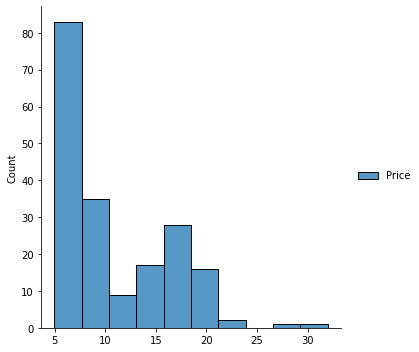

In [23]:
sns.displot(df)

In [24]:
df.Price.sum()

2072.16

In [25]:
df.groupby(by=['Genre']).sum().sort_values(by=['Price'], ascending=False)

,Price
Genre,
Fiction & Literature,694.80
Romance,644.07
Mystery & Suspense,410.92
Science Fiction & Fantasy,216.13
Nonfiction,71.95
Comics & Graphic Novels,13.31
Kids,11.99
Fiction - YA,8.99
